# Introduction to Graph Theory

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Simple Undirected Network

In [2]:
#Create an Undirected Network
G=nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('C','E')
G.add_edge('E','D')
G.add_edge('C','F')
G.add_edge('F','G')

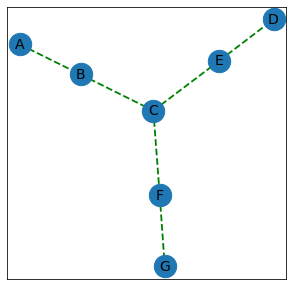

In [3]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

## Directed Network

In [4]:
#Create a directed Network
G=nx.DiGraph()
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('C','E')
G.add_edge('E','D')
G.add_edge('C','F')
G.add_edge('F','G')

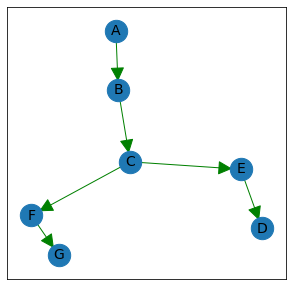

In [5]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1,style='dashed',edge_color='g',
                      arrowsize=30) #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

## Weighted Networks with Edge Attributes added

In [6]:
G=nx.Graph()
G.add_edge('A','B',weight=5,relation='friend')
G.add_edge('B','C',weight=10,relation='friend')
G.add_edge('C','E',weight=15,relation='neighbor')
G.add_edge('E','D',weight=5,relation='coworker')
G.add_edge('C','F',weight=7,relation='friend')
G.add_edge('F','G',weight=9,relation='family')


No handles with labels found to put in legend.


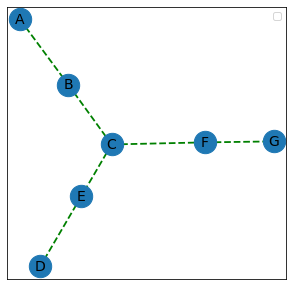

In [7]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.legend()
plt.show()

# Creating a Bipartite Graph

In [8]:
#We create bipartite graph same as regular undirected graph.
B=nx.Graph()
a=["A","B","C","D","E"]
B.add_nodes_from(["A","B","C","D","E"],bipartite=0)
B.add_nodes_from(["1","2","3","4"],bipartite=1)
B.add_edges_from([('A','1'),('C','1'),('D','2'),('B','3'),
                  ('E','1'),('B','2'),('A','3'),('C','4')])


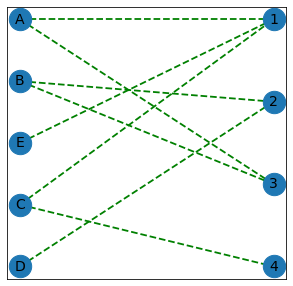

In [9]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.bipartite_layout(B,a)
nx.draw_networkx_nodes(B, pos, node_size=500)
nx.draw_networkx_edges(B,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(B, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

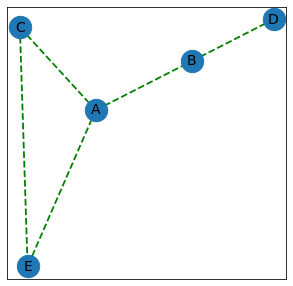

In [10]:
#Create Projected Graph
P=nx.bipartite.projected_graph(B,a)
plt.figure(figsize=(5,5))
pos=nx.spring_layout(P)
nx.draw_networkx_nodes(P, pos, node_size=500)
nx.draw_networkx_edges(P,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(P, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

# The Karate Club

In [11]:
G = nx.karate_club_graph()

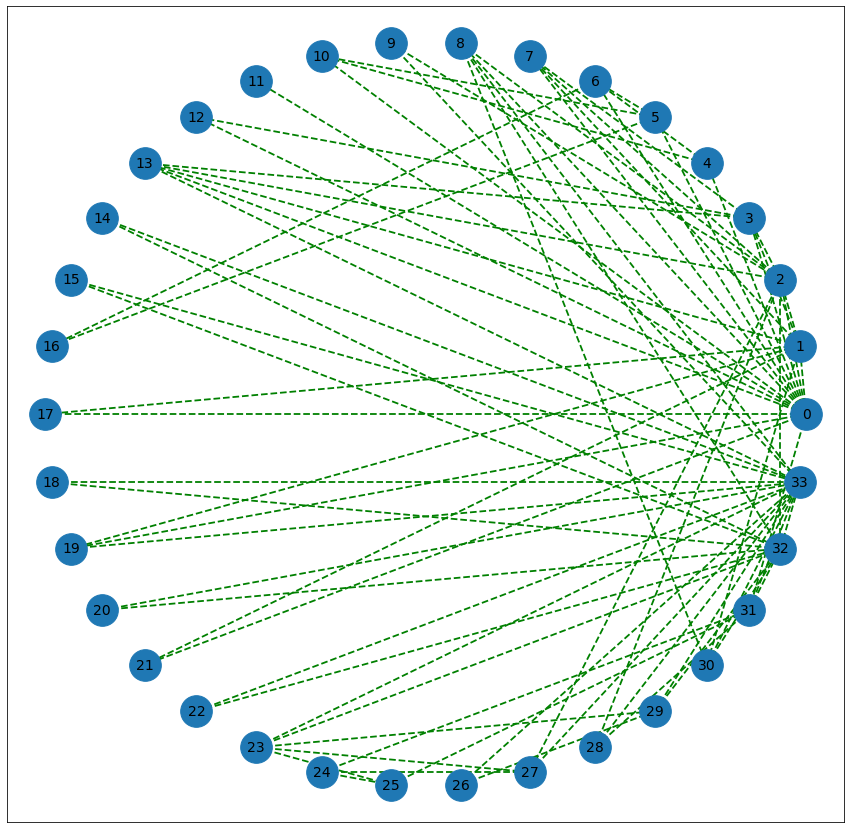

In [14]:
plt.figure(figsize=(15,15))
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

In [14]:
# Degree Centrality: Assumes important nodes have many connections
centrality=nx.degree_centrality(G)
print ('Max. Degree Centrality:',
       max(centrality),round(max(centrality.values()),4))
print ('Min. Degree Centrality:',
       min(centrality),round(min(centrality.values()),4))

Max. Degree Centrality: 33 0.5152
Min. Degree Centrality: 0 0.0303


In [15]:
#Closeness Centrality: Important nodes are close to other nodes
closeCent=nx.closeness_centrality(G)
sort_CC=list(sorted((value,key) for (key,value) in closeCent.items()))
print ("Max. Closeness Centrality:",sort_CC[-1],
       "\nMin. Closeness Centrality:",sort_CC[0])

Max. Closeness Centrality: (0.5689655172413793, 0) 
Min. Closeness Centrality: (0.28448275862068967, 16)


In [16]:
#Betweenness Centrality: important nodes connect other nodes
btwnCent=nx.betweenness_centrality(G)
sort_bC=list(sorted((value,key) for (key,value) in btwnCent.items()))
print ("Max. Betweenness Centrality:",sort_bC[-1],
       "\nMin. Betweenness Centrality:",sort_bC[0])

Max. Betweenness Centrality: (0.43763528138528146, 0) 
Min. Betweenness Centrality: (0.0, 7)


In [17]:
btwnCent_edge=nx.edge_betweenness_centrality(G,normalized=True)
sort_bCe=list(sorted((value,key) for (key,value) in btwnCent_edge.items()))
print ("Max. Edge Betweenness Centrality:",sort_bCe[-1],
       "\nMin. Edge Betweenness Centrality:",sort_bCe[0])

Max. Edge Betweenness Centrality: (0.1272599949070537, (0, 31)) 
Min. Edge Betweenness Centrality: (0.0029708853238265, (4, 10))


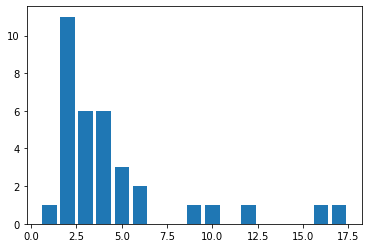

In [18]:
#Plot of Degree distributions
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);

In [60]:
#PageRank 
pr=nx.pagerank(G,alpha=0.85)
dict(sorted(pr.items(), key=lambda item: item[1]))

{11: 0.009564916863537148,
 9: 0.014308950284462801,
 14: 0.014535161524273825,
 15: 0.014535161524273825,
 18: 0.014535161524273825,
 20: 0.014535161524273825,
 22: 0.014535161524273825,
 17: 0.014558859774243493,
 21: 0.014558859774243493,
 12: 0.014645186487916191,
 26: 0.015043395360629753,
 16: 0.016785378110253487,
 28: 0.01957296050943854,
 19: 0.019604416711937293,
 25: 0.021005628174745786,
 24: 0.021075455001162945,
 4: 0.021979406974834498,
 10: 0.021979406974834498,
 7: 0.024490758039509182,
 30: 0.02458933653429248,
 27: 0.025638803528350497,
 29: 0.02628726283711208,
 5: 0.02911334166344221,
 6: 0.02911334166344221,
 13: 0.029536314977202986,
 8: 0.029765339186167028,
 23: 0.03152091531163228,
 3: 0.03586064322306479,
 31: 0.03715663592267942,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 32: 0.07169213006588289,
 0: 0.09700181758983709,
 33: 0.1009179167487121}

## Distance Measures

In [22]:
#Average Distance between every pair or nodes
print('Average Distance between every pair or nodes:',
      nx.average_shortest_path_length(G))
print('Diameter of the graph:',nx.diameter(G))

Average Distance between every pair or nodes: 2.408199643493761
Diameter of the graph: 5


In [23]:
#Eccentricity of a node n is the largest distance between n and all other nodes
#Radius of a graph is the minimum eccentricity
print('Radius:',nx.radius(G))
#Periphery of a graph is the set of nodes with eccentricty=diameter.
print('Periphery:',nx.periphery(G))
#Center of a graph is set of nodes with eccentricity = radius
print("Center:",nx.center(G))

Radius: 3
Periphery: [14, 15, 16, 18, 20, 22, 23, 26, 29]
Center: [0, 1, 2, 3, 8, 13, 19, 31]


In [24]:
print ('Is the graph connected?',nx.is_connected(G))

Is the graph connected? True


## Network Robustness

In [27]:
#Smallest number of nodes taht can be removed to disconnect it
print('Node Connectivity:',nx.node_connectivity(G))
#Which Nodes?
print('Which Nodes to disconnect?',nx.minimum_node_cut(G))

Node Connectivity: 1
Which Nodes to disconnect? {0}


In [29]:
print('Edge Connectivity:',nx.edge_connectivity(G))
print('Which Edges to disconnect?\n',nx.minimum_edge_cut(G))

Edge Connectivity: 1
Which Edges to disconnect?
 {(11, 0)}


In [32]:
# Stop someone from connecting to another node
print(nx.edge_connectivity(G,0,22))
print('Which Edges to disconnect?\n',nx.minimum_edge_cut(G,0,22))

2
Which Edges to disconnect?
 {(32, 22), (33, 22)}


In [49]:
#Find all paths between two nodes
sorted(nx.all_simple_paths(G,0,18))

[[0, 1, 2, 3, 13, 33, 8, 30, 32, 18],
 [0, 1, 2, 3, 13, 33, 8, 32, 18],
 [0, 1, 2, 3, 13, 33, 14, 32, 18],
 [0, 1, 2, 3, 13, 33, 15, 32, 18],
 [0, 1, 2, 3, 13, 33, 18],
 [0, 1, 2, 3, 13, 33, 20, 32, 18],
 [0, 1, 2, 3, 13, 33, 22, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 25, 24, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 25, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 27, 24, 25, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 27, 24, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 29, 32, 18],
 [0, 1, 2, 3, 13, 33, 23, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 23, 25, 24, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 23, 25, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 23, 27, 24, 25, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 23, 27, 24, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 23, 32, 18],
 [0, 1, 2, 3, 13, 33, 26, 29, 32, 18],
 [0, 1, 2, 3, 13, 33, 27, 23, 25, 24, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 27, 23, 25, 31, 32, 18],
 [0, 1, 2, 3, 13, 33, 27, 23, 29, 32, 18],
 [0, 1, 2, 3, 13, 33, 27, 23, 32, 18],
 [0, 1, 2, 3, 13,

## Link Prediction

In [35]:
#Find common neighbors between any two nodes
#nx.non_edges(G2) returns the non-existent edges in the graph
print('Print first 5 pairs of non-edges:\n',list(nx.non_edges(G))[:5])
#nx.common_neighbors(G,u,v) returns the common neighbors of two nodes in a graph.
common_neigh=[(e[0],e[1],len(list(nx.common_neighbors(G,e[0],e[1])))) for e in nx.non_edges(G)]
cn=pd.DataFrame(common_neigh,columns=['Node_1','Node_2','cmn_nebrs'])
cn=cn.sort_values('cmn_nebrs',ascending=False)
cn[cn.cmn_nebrs >=4] # Print nodes pairs with 4 or more common neigbors

Print first 5 pairs of non-edges:
 [(0, 32), (0, 33), (0, 9), (0, 14), (0, 15)]


,Node_1,Node_2,cmn_nebrs
63,2,33,6
174,7,13,4
1,0,33,4


## Network Clustering

In [42]:
#Number of Triangles formed by all nodes
print ('Total # of Triangles:',
       nx.triangles(G))
# To calculate triangle formed by single or list of nodes
print ("Triangles formed by given list:",
       nx.triangles(G,[4,12]) )

Total # of Triangles: {0: 18, 1: 12, 2: 11, 3: 10, 4: 2, 5: 3, 6: 3, 7: 6, 8: 5, 9: 0, 10: 2, 11: 0, 12: 1, 13: 6, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 4, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 4, 30: 3, 31: 3, 32: 13, 33: 15}
Triangles formed by given list: {4: 2, 12: 1}


In [43]:
# Calculate Transitivity of Graph
# C = number of closed path of length 2/ number of paths of length 2
nx.transitivity(G)

0.2556818181818182

In [44]:
#Ci =  Number of pairs of neighbors of i that are connected/(number of Pairs of neighbors of i)
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [46]:
nx.average_clustering(G)

0.5706384782076823

In [47]:
#Square_clustering ( Forming a square)
#nx.square_clustering(G2) # Shows for entire graph
nx.square_clustering(G,[5])

{5: 0.25}

In [55]:
#Calculate Local Clustering Coeffecient
nx.clustering(G,1),nx.clustering(G,32)

(0.3333333333333333, 0.19696969696969696)

In [56]:
#Global clustering Coeffecient
nx.average_clustering(G)

0.5706384782076823

In [ ]:
#Random Network
#Scale Free Network
#Small World Network


# Generating Graphs

## G(n,p) Random Graph

In [70]:
G=nx.fast_gnp_random_graph(n=100,p=0.05, seed=42,directed=False)

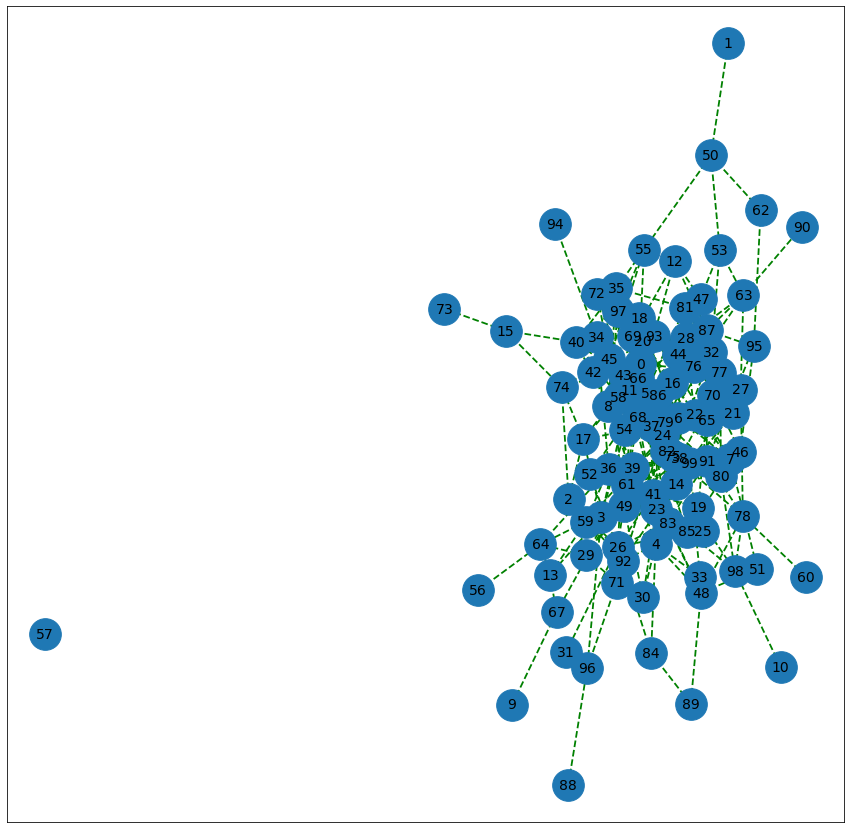

In [71]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

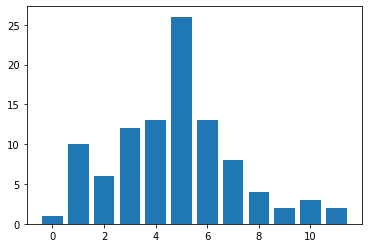

In [72]:
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);

## Configuration Model

In [80]:
sequence = nx.random_powerlaw_tree_sequence(100,gamma=3,seed=12, tries=5000)
G = nx.configuration_model(sequence)

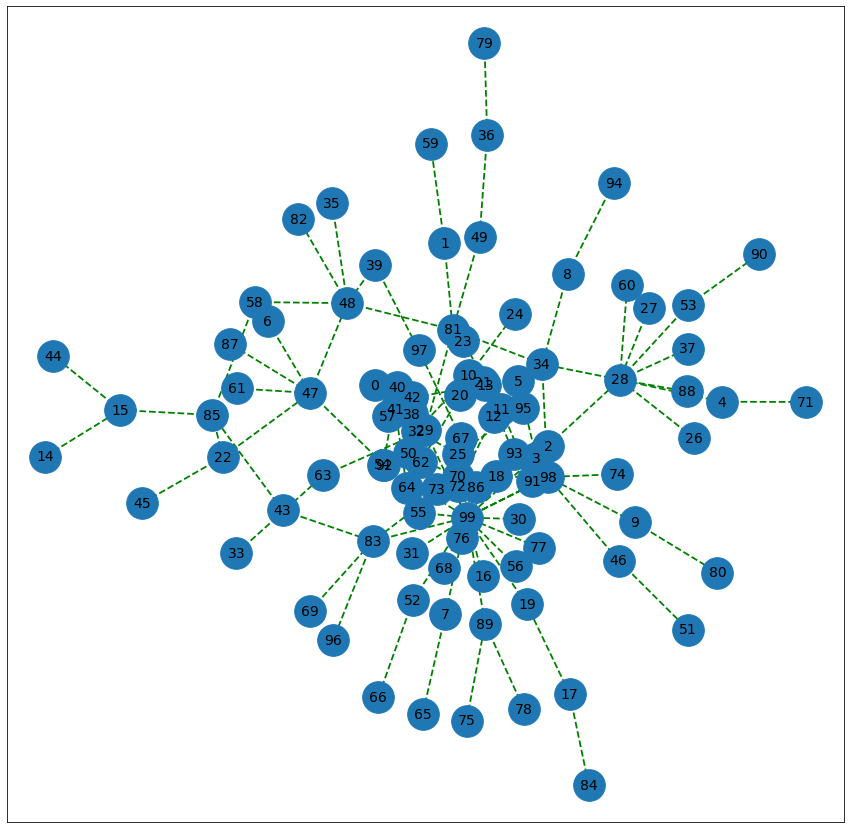

In [86]:
plt.figure(figsize=(15,15))
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

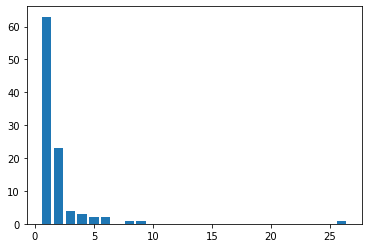

In [87]:
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);